# Electricity and Gas Consumption Analysis in France using Scikit-learn

## Introduction
I've been eagerly anticipating for months diving into data prediction using the Scikit-learn library and learning how to use GitHub properly. To kick things off, I'm tackling a fascinating dataset on annual electricity and gas consumption across different regions of France. My goal is to create stunning visualizations in Tableau and provide insightful information. Along the way, I'll guide you through the entire process, from cleaning and preprocessing the data to performing detailed analysis.

## Dataset Description
The dataset used in this project is sourced from https://www.agenceore.fr/opendata/consommation-annuelle-delectricite-et-gaz-par-region. It contains the following features:

### Data Description

- `OPERATEUR`: Name or identifier of the operator (object).
- `FILIERE`: Sector or industry associated with the operator (object).
- `Année`: Year of the data entry (int64).
- `Code Région`: Numerical code representing the region (int64).
- `Nom Région`: Name of the region (object).
- `CODE CATEGORIE CONSOMMATION`: Code representing the consumption category (object).
- `CODE GRAND SECTEUR`: Code representing the broad sector category (object).
- `CODE SECTEUR NAF2`: Code for the specific NAF2 sector (float64).
- `Nb sites`: Number of sites associated with the operator (float64).
- `Conso totale (MWh)`: Total consumption in megawatt-hours (float64).
- `Conso moyenne (MWh)`: Average consumption in megawatt-hours (float64).
- `Nombre de mailles secretisées`: Number of secretized grids (int64).
- `Part thermosensible (%)`: Percentage of thermosensitive consumption (float64).
- `Conso totale à usages thermosensibles (MWh)`: Total thermosensitive consumption in megawatt-hours (float64).
- `Conso totale à usages non thermosensibles (MWh)`: Total non-thermosensitive consumption in megawatt-hours (float64).
- `Thermosensibilité totale (kWh DJU)`: Total thermosensitivity in kilowatt-hours per degree day (float64).
- `Conso totale corrigée de l'aléa climatique à usages thermosensibles (MWh)`: Total corrected thermosensitive consumption accounting for climatic randomness in megawatt-hours (float64).
- `Conso moyenne à usages thermosensibles (MWh)`: Average thermosensitive consumption in megawatt-hours (float64).
- `Conso moyenne à usages non thermosensibles (MWh)`: Average non-thermosensitive consumption in megawatt-hours (float64).
- `Thermosensibilité moyenne (kWh DJU)`: Average thermosensitivity in kilowatt-hours per degree day (float64).
- `Conso moyenne corrigée de l'aléa climatique à usages thermosensibles (MWh)`: Average corrected thermosensitive consumption accounting for climatic randomness in megawatt-hours (float64).
- `DJU à TR`: Degree days at a reference temperature (float64).
- `DJU à TN`: Degree days at a normal temperature (float64).
- `Nombre d'habitants`: Number of inhabitants (float64).
- `Taux de logements collectifs`: Rate of collective housing (float64).
- `Taux de résidences principales`: Rate of main residences (float64).
- `Superficie des logements <30 m2`: Area of housing units smaller than 30 m² (float64).
- `Superficie des logements 30 à 40 m2`: Area of housing units between 30 and 40 m² (float64).
- `Superficie des logements 40 à 60 m2`: Area of housing units between 40 and 60 m² (float64).
- `Superficie des logements 60 à 80 m2`: Area of housing units between 60 and 80 m² (float64).
- `Superficie des logements 80 à 100 m2`: Area of housing units between 80 and 100 m² (float64).
- `Superficie des logements >100 m2`: Area of housing units larger than 100 m² (float64).
- `Résidences principales avant 1919`: Number of main residences built before 1919 (float64).
- `Résidences principales de 1919 à 1945`: Number of main residences built between 1919 and 1945 (float64).
- `Résidences principales de 1946 à 1970`: Number of main residences built between 1946 and 1970 (float64).
- `Résidences principales de 1971 à 1990`: Number of main residences built between 1971 and 1990 (float64).
- `Résidences principales de 1991 à 2005`: Number of main residences built between 1991 and 2005 (float64).
- `Résidences principales de 2006 à 2015`: Number of main residences built between 2006 and 2015 (float64).
- `Résidences principales après 2016`: Number of main residences built after 2016 (float64).
- `Taux de chauffage électrique`: Rate of electric heating (float64).


Our target variable is `consommation_gwh_pcs`, which we aim to predict based on the year.


## Data Exploration

### Loading Dataset

In [4]:
# Using pandas to load the dataset which is store in csv file
import pandas as pd

# Handling warning messages
import warnings as wr
wr.filterwarnings('ignore')

In [5]:
# Reading an excel file
data = pd.read_excel("C:/Users/sackd/Documents/GitHub/Electricity---Gas-Consumption-in-France/consommation-annuelle-d-electricite-et-gaz-par-region.xlsx")

### Data Overview

In [195]:
# Preview the first 5 rows of the dataset
data.head(5)

,OPERATEUR,FILIERE,Année,Code Région,Nom Région,CODE CATEGORIE CONSOMMATION,CODE GRAND SECTEUR,CODE SECTEUR NAF2,Nb sites,Conso totale (MWh),...,Superficie des logements 80 à 100 m2,Superficie des logements >100 m2,Résidences principales avant 1919,Résidences principales de 1919 à 1945,Résidences principales de 1946 à 1970,Résidences principales de 1971 à 1990,Résidences principales de 1991 à 2005,Résidences principales de 2006 à 2015,Résidences principales après 2016,Taux de chauffage électrique
0,Enedis,Electricité,2022,52,Pays de la Loire,RES,RESIDENTIEL,NaN,2063358.0,9.391515e+06,...,429600.353991,5.962754e+05,210994.379645,102355.656114,276144.958136,4.915801e+05,314872.509698,240169.295839,41188.310392,621.642179
1,Enedis,Electricité,2022,93,Provence-Alpes-Côte d'Azur,RES,RESIDENTIEL,NaN,3108573.0,1.429007e+07,...,462126.902093,5.123243e+05,222233.476506,176045.374817,578464.396425,7.130096e+05,339021.600515,235942.204190,45262.637502,944.765175
2,Enedis,Electricité,2022,84,Auvergne-Rhône-Alpes,RES,RESIDENTIEL,NaN,4262584.0,1.820709e+07,...,826656.079975,1.122039e+06,448939.066592,245296.781373,717499.377802,1.022797e+06,593819.632777,462815.283045,84139.251634,1200.323748
3,Enedis,Electricité,2022,75,Nouvelle-Aquitaine,RES,RESIDENTIEL,NaN,3232410.0,1.483974e+07,...,685524.012293,1.070549e+06,441847.713997,208417.922714,473944.925976,7.596308e+05,463613.985886,384277.010163,67965.528654,1463.059296
4,Antargaz-Finagaz,Gaz,2022,28,Normandie,RES,RESIDENTIEL,NaN,185.0,2.480101e+03,...,374119.456130,4.618557e+05,229168.245332,114451.509003,328961.894479,4.279800e+05,206026.482628,164880.107890,27839.971097,934.928464


In [196]:
# Preview the last 5 rows of the dataset
data.tail(5)

,OPERATEUR,FILIERE,Année,Code Région,Nom Région,CODE CATEGORIE CONSOMMATION,CODE GRAND SECTEUR,CODE SECTEUR NAF2,Nb sites,Conso totale (MWh),...,Superficie des logements 80 à 100 m2,Superficie des logements >100 m2,Résidences principales avant 1919,Résidences principales de 1919 à 1945,Résidences principales de 1946 à 1970,Résidences principales de 1971 à 1990,Résidences principales de 1991 à 2005,Résidences principales de 2006 à 2015,Résidences principales après 2016,Taux de chauffage électrique
23276,GRDF,Gaz,2021,52,Pays de la Loire,ENT,INDUSTRIE,43.0,51.0,45665.12767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23277,GRDF,Gaz,2021,52,Pays de la Loire,ENT,TERTIAIRE,38.0,10.0,151151.92143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23278,GRDF,Gaz,2021,52,Pays de la Loire,ENT,TERTIAIRE,45.0,58.0,24736.36357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23279,GRDF,Gaz,2021,52,Pays de la Loire,ENT,TERTIAIRE,46.0,132.0,363624.06560,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23280,GRDF,Gaz,2021,52,Pays de la Loire,ENT,TERTIAIRE,47.0,170.0,87391.12489,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
data.shape

(23281, 40)

In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23281 entries, 0 to 23280
Data columns (total 40 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   OPERATEUR                                                                   23281 non-null  object 
 1   FILIERE                                                                     23281 non-null  object 
 2   Année                                                                       23281 non-null  int64  
 3   Code Région                                                                 23281 non-null  int64  
 4   Nom Région                                                                  23281 non-null  object 
 5   CODE CATEGORIE CONSOMMATION                                                 23281 non-null  object 
 6   CODE GRAND SECTEUR                            

In [199]:
data.describe

<bound method NDFrame.describe of               OPERATEUR      FILIERE  Année  Code Région  \
0                Enedis  Electricité   2022           52   
1                Enedis  Electricité   2022           93   
2                Enedis  Electricité   2022           84   
3                Enedis  Electricité   2022           75   
4      Antargaz-Finagaz          Gaz   2022           28   
...                 ...          ...    ...          ...   
23276              GRDF          Gaz   2021           52   
23277              GRDF          Gaz   2021           52   
23278              GRDF          Gaz   2021           52   
23279              GRDF          Gaz   2021           52   
23280              GRDF          Gaz   2021           52   

                       Nom Région CODE CATEGORIE CONSOMMATION  \
0                Pays de la Loire                         RES   
1      Provence-Alpes-Côte d'Azur                         RES   
2            Auvergne-Rhône-Alpes                 

In [200]:
data.isnull().sum()

OPERATEUR                                                                         0
FILIERE                                                                           0
Année                                                                             0
Code Région                                                                       0
Nom Région                                                                        0
CODE CATEGORIE CONSOMMATION                                                       0
CODE GRAND SECTEUR                                                                0
CODE SECTEUR NAF2                                                              7843
Nb sites                                                                        537
Conso totale (MWh)                                                              537
Conso moyenne (MWh)                                                             228
Nombre de mailles secretisées                                               

In [201]:
data.nunique()

OPERATEUR                                                                       192
FILIERE                                                                           2
Année                                                                            12
Code Région                                                                      18
Nom Région                                                                       20
CODE CATEGORIE CONSOMMATION                                                       4
CODE GRAND SECTEUR                                                                5
CODE SECTEUR NAF2                                                                88
Nb sites                                                                       3627
Conso totale (MWh)                                                            21171
Conso moyenne (MWh)                                                           19362
Nombre de mailles secretisées                                               

### Data Cleaning

## Exploratory Data Analysis

### Visual Data Exploration

In [202]:
# Import numpy for any mathematical functions
import numpy as np

# Import matplotlib & seaborn for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

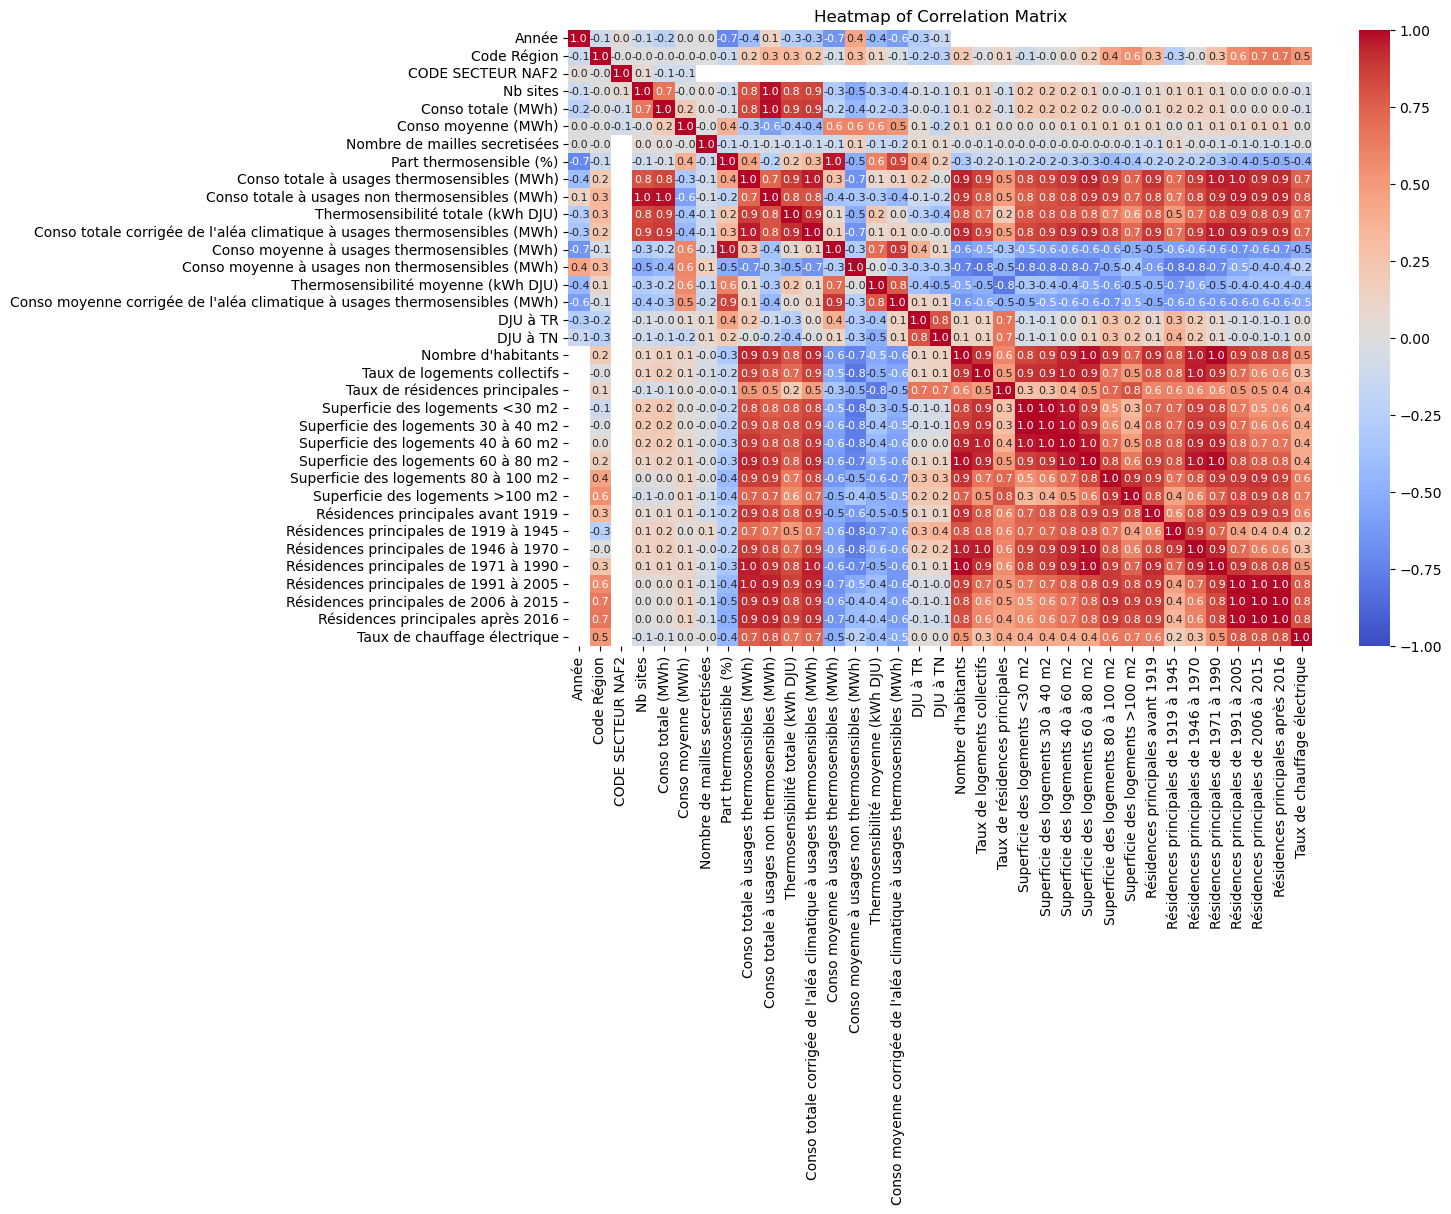

In [203]:
# Select only the integer and float columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Generate the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt=".1f",annot_kws={"size": 8}, vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()

## Data Analysis

## Predicting Electricity and Gas Consumption in the Coming Years

In [6]:
# Formatting each dataframe display with only 2 values after "."
pd.options.display.float_format = '{:,.2f}'.format

### Cleaning Dataset for predicting

In [7]:
# I will only work with these data to predict the consumption for the next year
predict_data = data[["OPERATEUR","FILIERE","Année","Code Région","Nom Région","Conso totale (MWh)"]]

In [8]:
# Rename all the column
predict_data.rename(columns={"OPERATEUR":"OPERATOR","FILIERE":"Type","Nom Région":"Region","Année":"Year","Code Région":"Region_Code","Conso totale (MWh)":"Consumption_MWh"},inplace=True)

In [9]:
# Redefine the datatype

# Redefine the region code from integer to string
predict_data["Region_Code"] = predict_data["Region_Code"].astype(str)

# Make sure the electricity & gas column is a float type
predict_data["Consumption_MWh"] = predict_data["Consumption_MWh"].astype(float)

# Make sure that is no error for the region name
predict_data["Region"] = predict_data["Region"].str.replace("-"," ")

In [10]:
# Create a dataframe which contains only the Region, Year and the sum of Consumption by Region & Year
consumption = predict_data.groupby(["Region","Year"])["Consumption_MWh"].sum().reset_index()

In [11]:
consumption

,Region,Year,Consumption_MWh
0,Auvergne Rhône Alpes,2011,"96,603,697.13"
1,Auvergne Rhône Alpes,2012,"114,161,311.80"
2,Auvergne Rhône Alpes,2013,"114,100,608.05"
3,Auvergne Rhône Alpes,2014,"103,955,333.34"
4,Auvergne Rhône Alpes,2015,"111,722,227.51"
...,...,...,...
202,Île de France,2018,"138,904,618.88"
203,Île de France,2019,"137,431,372.99"
204,Île de France,2020,"128,928,030.97"
205,Île de France,2021,"139,800,857.54"


### Predicting Electricity & Gas Consumption by Region

In [31]:
# Import Packages


# Import seaborn for plotting graph
import seaborn as sns

# Import matplotlib for plotting graph
import matplotlib.pyplot as plt

# Using the Linear Regression model to predict the future value
from sklearn.linear_model import LinearRegression

In [32]:
# Create a blank dataframe to store predicted value
predicted_data = pd.DataFrame(columns=['Region', 'Year', 'Consumption_MWh'])

In [33]:
# Loop over each unique region
for region in consumption['Region'].unique():
    # Filter data for the current region
    region_data = consumption[consumption['Region'] == region]
    
    # Split the data into 2 : Years and Consumption_MWh
    X = region_data[['Year']]
    y = region_data['Consumption_MWh']
    
    # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Use the model to predict values from 2023 to 2030
    future_years = [[year] for year in range(2023, 2031)]
    predicted_consumption = model.predict(future_years)
    
    # Create a dataframe for the predicted values
    region_predicted_df = pd.DataFrame({
        'Region': [region] * len(future_years),
        'Year': [year[0] for year in future_years],
        'Consumption_MWh': predicted_consumption
    })
    
    # Append the predicted dataframe to the initial blank dataframe
    predicted_data = pd.concat([predicted_data, region_predicted_df], ignore_index=True)


In [34]:
predicted_data.head(5)

,Region,Year,Consumption_MWh
0,Auvergne Rhône Alpes,2023,"120,076,012.72"
1,Auvergne Rhône Alpes,2024,"121,341,371.60"
2,Auvergne Rhône Alpes,2025,"122,606,730.49"
3,Auvergne Rhône Alpes,2026,"123,872,089.37"
4,Auvergne Rhône Alpes,2027,"125,137,448.25"


In [35]:
# Concatenate the original dataframe with the predicted dataframe
overall_consumption = pd.concat([consumption,predicted_data], ignore_index=True)

In [36]:
# Make sure the type of the column year is correct
overall_consumption["Year"] = pd.to_datetime(overall_consumption['Year'],format="%Y")

In [37]:
# Convert the consumption value from MWh to TWh
overall_consumption["Consumption_TWh"] = overall_consumption["Consumption_MWh"]*10**(-6)

In [38]:
# Rename Year to Date and create another column to take only the year from Date
overall_consumption.rename(columns={"Year":"Date"},inplace=True)
overall_consumption["Year"] = overall_consumption["Date"].dt.year

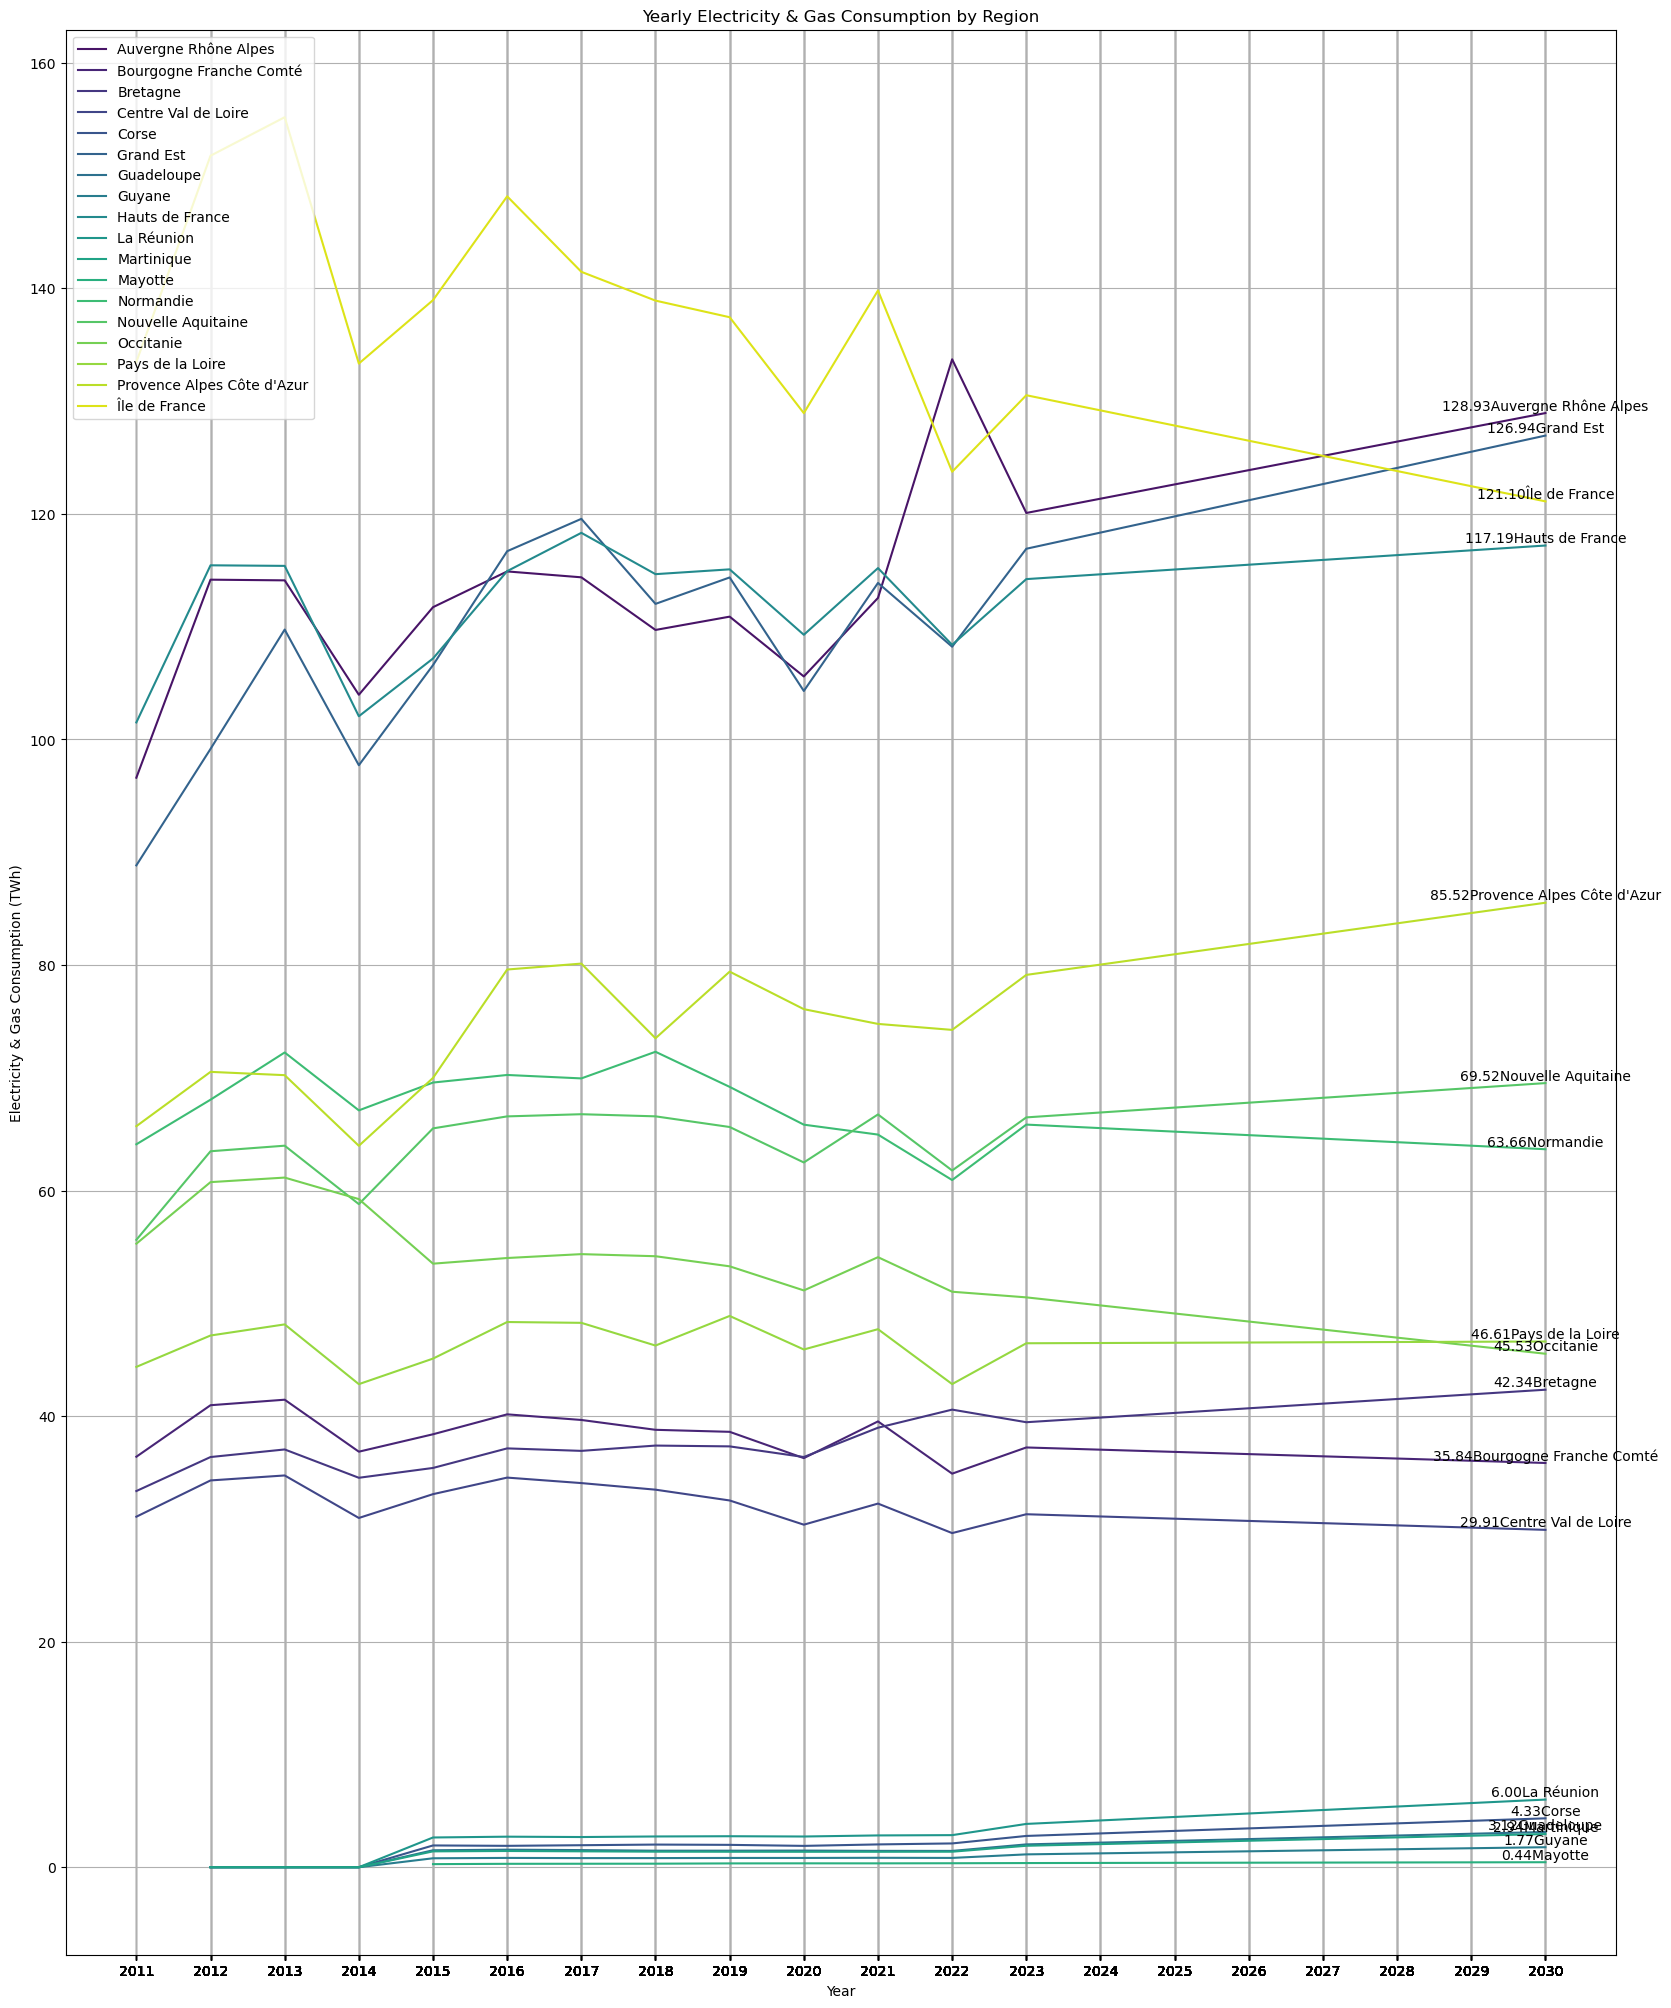

In [42]:
# Plotting the figure
plt.figure(figsize=(20, 25)) # Set the size to be able to see the annotation 
sns.lineplot(data=overall_consumption, x='Year', y='Consumption_TWh', hue='Region', palette='viridis')

# Formatting the plot
plt.xlabel('Year')
plt.ylabel('Electricity & Gas Consumption (TWh)')
plt.title('Yearly Electricity & Gas Consumption by Region')

# Display Year
years = overall_consumption['Year']
plt.xticks(years)

# Annotate the last value and its region for each region without overlap
annotation_offsets = {region: 0 for region in overall_consumption['Region'].unique()}
for region in overall_consumption['Region'].unique():
    region_data = overall_consumption[overall_consumption['Region'] == region]
    last_point = region_data.iloc[-1]
    annotation_text = f'{last_point["Consumption_TWh"]:.2f}'+region
    # Adjust y-coordinate based on previous annotations in the same region
    y_offset = annotation_offsets[region]
    plt.annotate(annotation_text,
                 (last_point['Year'], last_point['Consumption_TWh']),
                 textcoords="offset points",
                 xytext=(0, y_offset),
                 ha='center',
                 va='bottom')
    # Update y-offset for next annotation
    annotation_offsets[region] -= 10

# Move legend to upper left
plt.legend(loc='upper left')

plt.grid(True)

plt.savefig('C:/Users/sackd/Documents/GitHub/Electricity---Gas-Consumption-in-France/sample.png')

plt.show()
